In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
alt_1 = pd.read_csv("./out/alt_1.csv",names=['id', 'type','is_tob','delay1'])
alt_2 = pd.read_csv("./out/alt_2.csv",names=['id2', 'type2','is_tob2','delay2'])

In [131]:
# plt.boxplot(alt_1['delay'], alt_2['delay'])
# sns.boxplot( data=alt_2['delay'])
# plt.show()
all = pd.concat([alt_1, alt_2[['delay2']]],ignore_index=True, axis = 1)
all.columns = alt_1.columns.to_list()   + alt_2.columns.to_list()[-1:] 

print(all.head())
print(all.describe())
# sns.boxplot( data=all[["delay1", "delay2"]])
# plt.show()

# for index, row in all.iterrows(): 
#     if ((row.id1,row.type1,row.is_tob1) != (row.id2,row.type2,row.is_tob2)):
#         print(index, row.id1, row.id2)

id  type  is_tob  delay1  delay2
0  7162397422582759495     0       1       2       2
1  7162397422582659498     0       0       2       2
2  7162397422582747444     0       0       2       2
3  7162397422577053031     0       0       2       2
4  7162397422581831216     0       0       2       2
                 id           type         is_tob         delay1  \
count  2.429770e+05  242977.000000  242977.000000  242977.000000   
mean   7.162781e+18       1.223243       0.322002       7.787968   
std    4.917148e+14       1.350798       0.467245       5.574115   
min    7.114909e+18       0.000000       0.000000       2.000000   
25%    7.162793e+18       0.000000       0.000000       2.000000   
50%    7.162793e+18       1.000000       0.000000      13.000000   
75%    7.162793e+18       3.000000       1.000000      13.000000   
max    7.162793e+18       3.000000       1.000000     162.000000   

              delay2  
count  242977.000000  
mean       12.261412  
std         5.972611

In [152]:
def plot_box(df):
    print(df.describe())
    sns.boxplot( data=df[["delay1", "delay2"]])
    return plt

id      type         is_tob    delay1         delay2
count  1.156570e+05  115657.0  115657.000000  115657.0  115657.000000
mean   7.162771e+18       0.0       0.253110       2.0       9.494592
std    6.977409e+14       0.0       0.434796       0.0       6.984995
min    7.114909e+18       0.0       0.000000       2.0       2.000000
25%    7.162793e+18       0.0       0.000000       2.0       2.000000
50%    7.162793e+18       0.0       0.000000       2.0      14.000000
75%    7.162793e+18       0.0       1.000000       2.0      15.000000
max    7.162793e+18       0.0       1.000000       2.0      30.000000


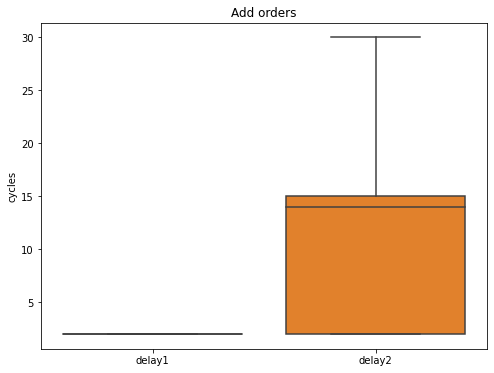

id     type   is_tob        delay1        delay2
count  4.237000e+04  42370.0  42370.0  42370.000000  42370.000000
mean   7.162790e+18      1.0      1.0     13.128298     13.127637
std    1.983644e+14      0.0      0.0      1.600516      1.585754
min    7.125982e+18      1.0      1.0     13.000000     13.000000
25%    7.162793e+18      1.0      1.0     13.000000     13.000000
50%    7.162793e+18      1.0      1.0     13.000000     13.000000
75%    7.162793e+18      1.0      1.0     13.000000     13.000000
max    7.162793e+18      1.0      1.0     86.000000     86.000000


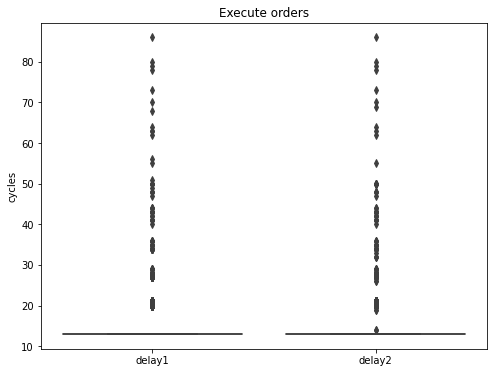

id     type        is_tob        delay1        delay2
count  8.495000e+04  84950.0  84950.000000  84950.000000  84950.000000
mean   7.162790e+18      3.0      0.077634     13.004556     15.596315
std    9.405314e+13      0.0      0.267596      0.737906      3.525903
min    7.153309e+18      3.0      0.000000     13.000000     14.000000
25%    7.162793e+18      3.0      0.000000     13.000000     15.000000
50%    7.162793e+18      3.0      0.000000     13.000000     15.000000
75%    7.162793e+18      3.0      0.000000     13.000000     15.000000
max    7.162793e+18      3.0      1.000000    162.000000     44.000000


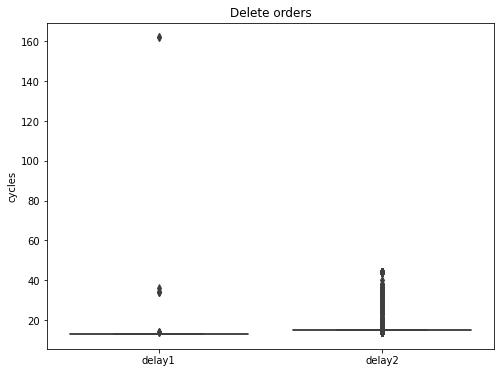

In [164]:
a4_dims = (8, 6)

fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Add orders')
plt.ylabel('cycles')
plot_box(all.query('type==0')).show()

fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Execute orders')
plt.ylabel('cycles')
plot_box(all.query('type==1')).show()

fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Delete orders')
plt.ylabel('cycles')
plot_box(all.query('type==3')).show()

id          type   is_tob        delay1        delay2
count  7.823900e+04  78239.000000  78239.0  78239.000000  78239.000000
mean   7.162792e+18      0.794425      1.0      8.953732      9.588300
std    1.461319e+14      0.817973      0.0      5.504341      5.585742
min    7.125982e+18      0.000000      1.0      2.000000      2.000000
25%    7.162793e+18      0.000000      1.0      2.000000      2.000000
50%    7.162793e+18      1.000000      1.0     13.000000     13.000000
75%    7.162793e+18      1.000000      1.0     13.000000     13.000000
max    7.162793e+18      3.000000      1.0     86.000000     86.000000


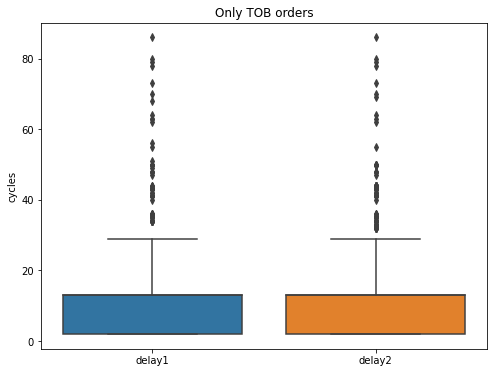

In [169]:
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Only TOB orders')
plt.ylabel('cycles')
plot_box(all.query('is_tob==1')).show()

id     type   is_tob   delay1        delay2
count  2.927400e+04  29274.0  29274.0  29274.0  29274.000000
mean   7.162793e+18      0.0      1.0      2.0      3.253911
std    7.671556e+12      0.0      0.0      0.0      3.795266
min    7.162397e+18      0.0      1.0      2.0      2.000000
25%    7.162793e+18      0.0      1.0      2.0      2.000000
50%    7.162793e+18      0.0      1.0      2.0      2.000000
75%    7.162793e+18      0.0      1.0      2.0      2.000000
max    7.162793e+18      0.0      1.0      2.0     28.000000


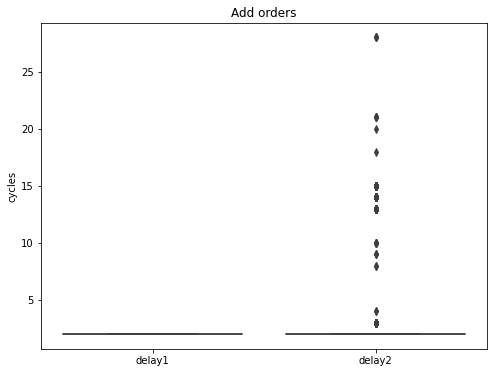

id     type   is_tob        delay1        delay2
count  4.237000e+04  42370.0  42370.0  42370.000000  42370.000000
mean   7.162790e+18      1.0      1.0     13.128298     13.127637
std    1.983644e+14      0.0      0.0      1.600516      1.585754
min    7.125982e+18      1.0      1.0     13.000000     13.000000
25%    7.162793e+18      1.0      1.0     13.000000     13.000000
50%    7.162793e+18      1.0      1.0     13.000000     13.000000
75%    7.162793e+18      1.0      1.0     13.000000     13.000000
max    7.162793e+18      1.0      1.0     86.000000     86.000000


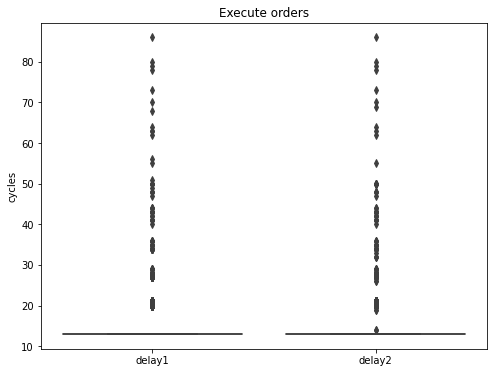

id    type  is_tob       delay1       delay2
count  6.595000e+03  6595.0  6595.0  6595.000000  6595.000000
mean   7.162793e+18     3.0     1.0    13.000303    14.966793
std    1.615332e+13     0.0     0.0     0.017413     1.592546
min    7.162397e+18     3.0     1.0    13.000000    14.000000
25%    7.162793e+18     3.0     1.0    13.000000    15.000000
50%    7.162793e+18     3.0     1.0    13.000000    15.000000
75%    7.162793e+18     3.0     1.0    13.000000    15.000000
max    7.162793e+18     3.0     1.0    14.000000    44.000000


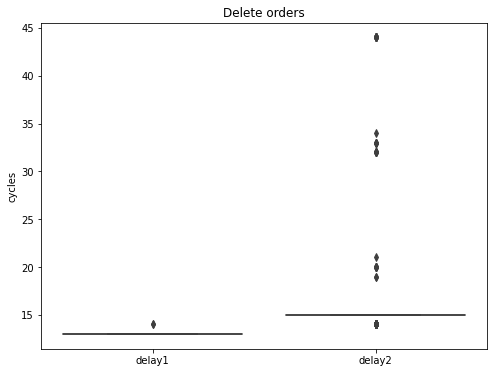

In [167]:
a4_dims = (8, 6)

fig, ax = plt.subplots(figsize=a4_dims)
plt.title('TOB and Add orders')
plt.ylabel('cycles')
plot_box(all.query('type==0 and is_tob==1')).show()

fig, ax = plt.subplots(figsize=a4_dims)
plt.title('TOB and Execute orders')
plt.ylabel('cycles')
plot_box(all.query('type==1 and is_tob==1')).show()

fig, ax = plt.subplots(figsize=a4_dims)
plt.title('TOB and Delete orders')
plt.ylabel('cycles')
plot_box(all.query('type==3 and is_tob==1')).show()